<a href="https://colab.research.google.com/github/pnkj51/Tomato-Disease-Prediction/blob/main/Tomato_disease_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pankajshivhare","key":"5b83657e77e9b8ccb2a7ae024a70c70d"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
 ! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d noulam/tomato

100% 740M/743M [00:07<00:00, 121MB/s]
100% 743M/743M [00:07<00:00, 108MB/s]


In [8]:
! unzip /content/tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [9]:
from tensorflow.keras.layers import Dense,Lambda,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [10]:
IMAGE_SIZE = [224, 224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

In [11]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [12]:
for layer in inception.layers:
  layer.trainable = False

In [13]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')

In [14]:
len(folders)

10

In [15]:
x = Flatten()(inception.output)

In [16]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=inception.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=False,
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train/',
                                                 target_size=(224,224),
                                                 class_mode='categorical', batch_size=32)
valid_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid/',
                                                 target_size=(224,224),
                                                 class_mode='categorical', batch_size=32)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [21]:
r = model.fit(training_set,validation_data=valid_set,
              epochs =10,batch_size=60,
              steps_per_epoch=len(training_set),
              validation_steps=len(valid_set)
              )

Epoch 1/10
574/574 [==============================] - 255s 386ms/step - loss: 2.9138 - accuracy: 0.6811 - val_loss: 2.0989 - val_accuracy: 0.7815
Epoch 2/10
574/574 [==============================] - 218s 379ms/step - loss: 2.0776 - accuracy: 0.7937 - val_loss: 2.5699 - val_accuracy: 0.7819
Epoch 3/10
574/574 [==============================] - 217s 377ms/step - loss: 1.8947 - accuracy: 0.8313 - val_loss: 2.4544 - val_accuracy: 0.8022
Epoch 4/10
574/574 [==============================] - 217s 377ms/step - loss: 1.7382 - accuracy: 0.8518 - val_loss: 2.3975 - val_accuracy: 0.8205
Epoch 5/10
574/574 [==============================] - 216s 376ms/step - loss: 1.6071 - accuracy: 0.8703 - val_loss: 2.3837 - val_accuracy: 0.8325
Epoch 6/10
574/574 [==============================] - 216s 376ms/step - loss: 1.4314 - accuracy: 0.8807 - val_loss: 2.6674 - val_accuracy: 0.8340
Epoch 7/10
574/574 [==============================] - 216s 376ms/step - loss: 1.5816 - accuracy: 0.8823 - val_loss: 2.2405 -

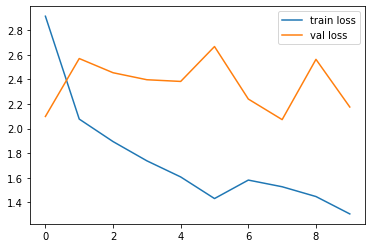

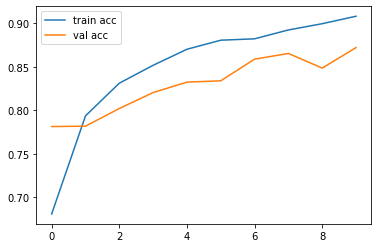

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [23]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [25]:
y_pred = model.predict(valid_set)
y_pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.35636596e-29, 1.99981302e-16, 1.00000000e+00, ...,
        4.44936184e-28, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.76711393e-22, 3.49294301e-36, ...,
        0.00000000e+00, 0.00000000e+00, 5.08837432e-27],
       ...,
       [0.00000000e+00, 2.38220985e-19, 8.98261141e-28, ...,
        1.36312629e-36, 0.00000000e+00, 1.51721705e-30],
       [0.00000000e+00, 1.40910681e-16, 6.61888798e-29, ...,
        1.13450973e-17, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00526261e-28, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]], dtype=float32)

In [26]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 6, ..., 6, 3, 8])

In [27]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('/content/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/005a2c1f-4e15-49e4-9e5c-61dc3ecf9708___RS_Late.B 5096_flipLR.JPG',target_size=(224,224))

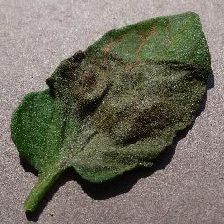

In [29]:
img

In [30]:
x=image.img_to_array(img)
x

array([[[193., 182., 180.],
        [196., 185., 183.],
        [200., 189., 187.],
        ...,
        [183., 172., 170.],
        [169., 158., 156.],
        [176., 165., 163.]],

       [[201., 190., 188.],
        [193., 182., 180.],
        [189., 178., 176.],
        ...,
        [175., 164., 162.],
        [181., 170., 168.],
        [184., 173., 171.]],

       [[199., 188., 186.],
        [190., 179., 177.],
        [183., 172., 170.],
        ...,
        [166., 155., 153.],
        [181., 170., 168.],
        [173., 162., 160.]],

       ...,

       [[134., 123., 121.],
        [ 96.,  85.,  83.],
        [140., 129., 127.],
        ...,
        [147., 131., 131.],
        [147., 131., 131.],
        [133., 117., 117.]],

       [[149., 138., 136.],
        [154., 143., 141.],
        [126., 115., 113.],
        ...,
        [135., 119., 119.],
        [137., 121., 121.],
        [125., 109., 109.]],

       [[141., 130., 128.],
        [145., 134., 132.],
        [127., 1

In [31]:
x=x/255
x = np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [32]:
model.predict(x)

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.8155957e-28,
        7.3406767e-30, 0.0000000e+00, 1.8719232e-34, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [33]:
np.argmax(model.predict(x), axis=1)

array([2])